# Pipeline

For demonstration purpases we use a prerecorded run. We divide this run into chunks of length $N$ and on them do our processing and prediction steps. In reality the chunks would be a sliding window in time. 


In [1]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt
from utils import load_as_dataframe
from load_model import svm_predict
from visualization import visualize

C:\Users\HP\anaconda3\envs\radar\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load run

In [2]:
folder = 'data'
subfolder = 'mixed'
# filename = 'mixed_farness_1_moving_2_radardata_2022_05_08_17_41_04.npz' # good enough
filename = 'mixed_farness_0_moving_0_radardata_2022_05_08_21_38_34.npz' # really good
# filename = 'for_the_video.npz'


df = load_as_dataframe(os.path.join(folder, subfolder), filename)
print(df)

          abses0    abses1    abses2      phases
0       0.038579  0.602392  0.805303    1.172499
1       0.038889  0.593747  0.799594    1.147857
2       0.038032  0.581699  0.787694    1.138937
3       0.035736  0.579954  0.800465    1.137547
4       0.035774  0.571192  0.782706    1.123012
...          ...       ...       ...         ...
239995  0.011956  0.969757  0.210164  265.978731
239996  0.013717  0.981506  0.242848  265.976368
239997  0.013627  0.982188  0.235803  265.973591
239998  0.012251  0.984841  0.240029  265.968200
239999  0.011454  0.979785  0.255076  265.995823

[240000 rows x 4 columns]


## Model

In [3]:
movement_model_folder = 'svm_acc_95_2022_05_08_16_19_22'

with open(os.path.join(movement_model_folder, 'hyperparams.json'), 'r') as f:
    hyperparams = json.load(f)

In [4]:
pred_movement = svm_predict(movement_model_folder, df)
pred_movement_repeatd = np.repeat(pred_movement, hyperparams['chunk_size'])


100%|██████████| 80/80 [00:00<00:00, 116.94it/s]


In [5]:
stress_model_folder = 'stress_svm_acc_89_2022_05_08_21_24_05'

with open(os.path.join(movement_model_folder, 'hyperparams.json'), 'r') as f:
    hyperparams = json.load(f)
    
pred_stress = svm_predict(stress_model_folder, df)
pred_stress_repeatd = np.repeat(pred_stress, hyperparams['chunk_size'])
pred_stress_repeatd[pred_movement_repeatd == 1] = np.nan


100%|██████████| 80/80 [00:00<00:00, 115.15it/s]


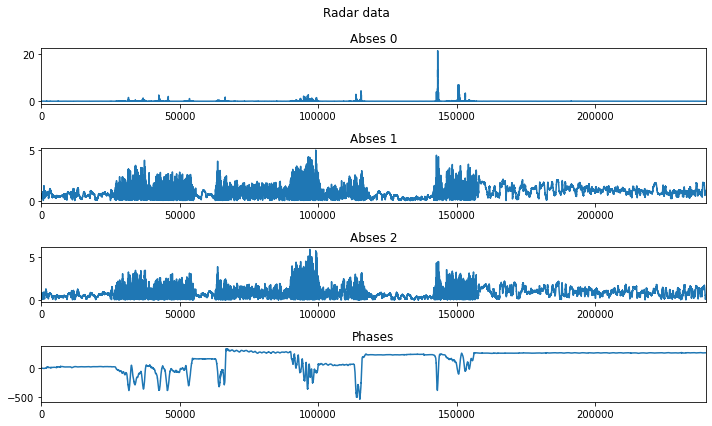

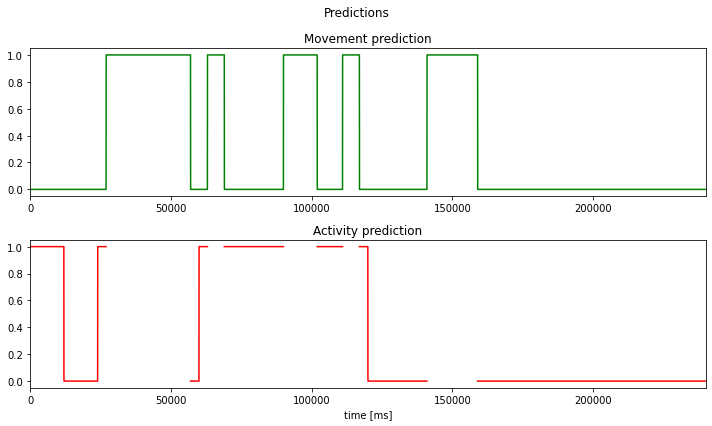

In [6]:
title = 'Radar data'
color = None
figsize = (10, 6)

visualize(os.path.join(folder, subfolder), filename, title, color, figsize=figsize, xlim=[0, len(pred_stress_repeatd)])

fig, ax = plt.subplots(2, 1, figsize=figsize)
fig.suptitle('Predictions')

ax[0].plot(pred_movement_repeatd, color='g')
ax[0].set_title('Movement prediction')
ax[0].set_xlim([0, len(pred_stress_repeatd)])


ax[1].plot(pred_stress_repeatd, color='r')
ax[1].set_title('Activity prediction')
ax[1].set_xlim([0, len(pred_stress_repeatd)])
ax[1].set_xlabel('time [ms]')
fig.tight_layout()